In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
import plotly.express as px
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import OneHotEncoder

print("All Modules Imported Successfully")

All Modules Imported Successfully


In [9]:
data = pd.read_csv("../data/insurance.csv")

In [11]:
insurance_df = pd.DataFrame(data)

In [13]:
insurance_df

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

In [13]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [15]:
insurance_df.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

In [19]:
insurance_df.shape

(1338, 7)

In [33]:
insurance_df['age'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Name: age, Length: 1338, dtype: bool

In [35]:
insurance_df['bmi'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Name: bmi, Length: 1338, dtype: bool

In [37]:
insurance_df['children'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Name: children, Length: 1338, dtype: bool

In [39]:
insurance_df['charges'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Name: charges, Length: 1338, dtype: bool

In [41]:
sns.set(style="whitegrid")

Text(0.5, 1.0, 'Age Distribution')

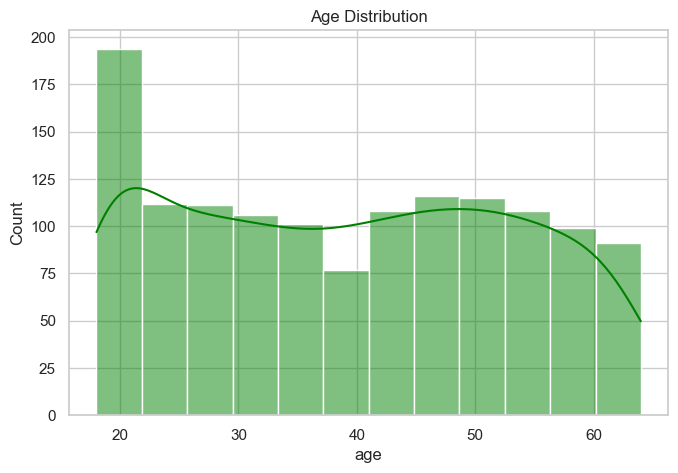

In [57]:
plt.figure(figsize = (17, 11))
plt.subplot(2, 2, 1)
sns.histplot(insurance_df['age'], kde=True, color='green')
plt.title('Age Distribution')

Text(0.5, 1.0, 'Age Boxplot')

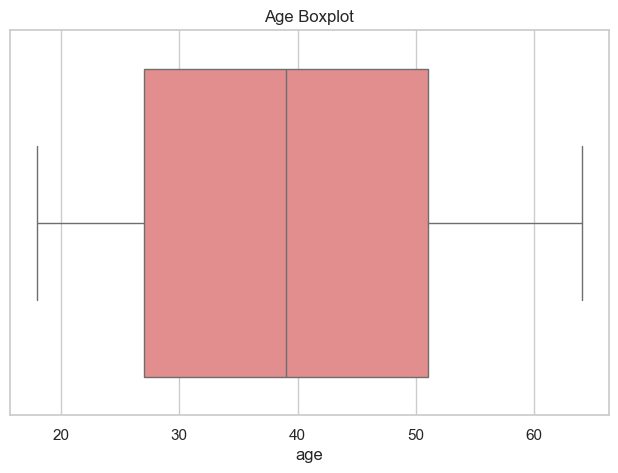

In [59]:
plt.figure(figsize = (17, 11))
plt.subplot(2, 2, 2)
sns.boxplot(x=insurance_df['age'], color='lightcoral')
plt.title('Age Boxplot')

Text(0.5, 1.0, 'Age Countplot')

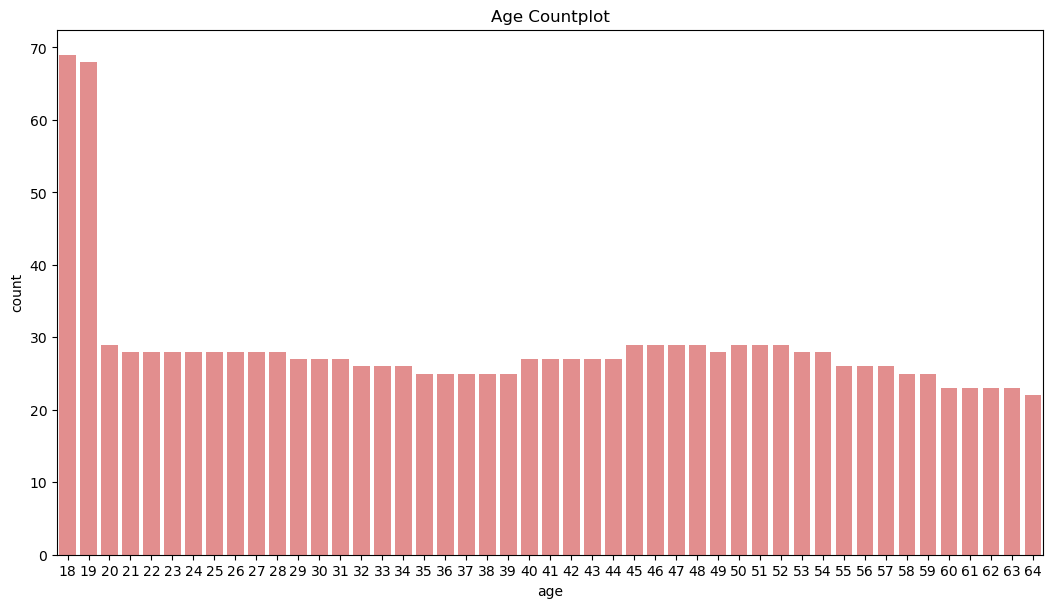

In [27]:
plt.figure(figsize = (28, 15))
plt.subplot(2, 2, 2)
sns.countplot(x=insurance_df['age'], color='lightcoral')
plt.title('Age Countplot')

Text(0.5, 1.0, 'Sex Distribution')

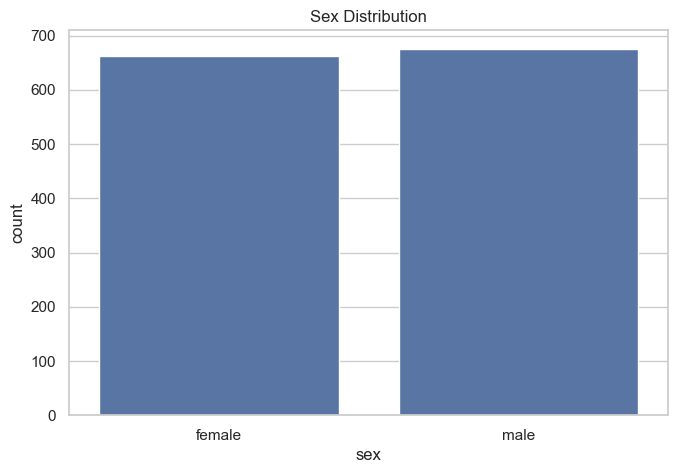

In [61]:
]\plt.figure(figsize = (17, 11))
plt.subplot(2, 2, 3)
sns.countplot(x = insurance_df['sex'])
plt.title('Sex Distribution')

Text(0.5, 1.0, 'BMI Distribution')

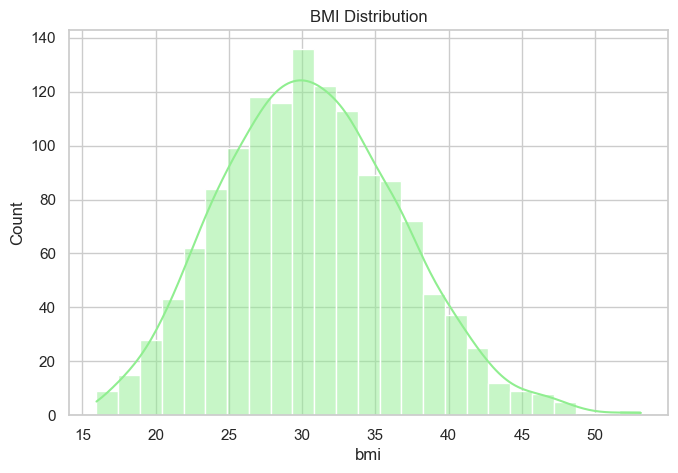

In [63]:
plt.figure(figsize = (17, 11))
plt.subplot(2, 2, 1)
sns.histplot(insurance_df['bmi'], kde=True, color='lightgreen')
plt.title('BMI Distribution')

Text(0.5, 1.0, 'BMI Boxplot')

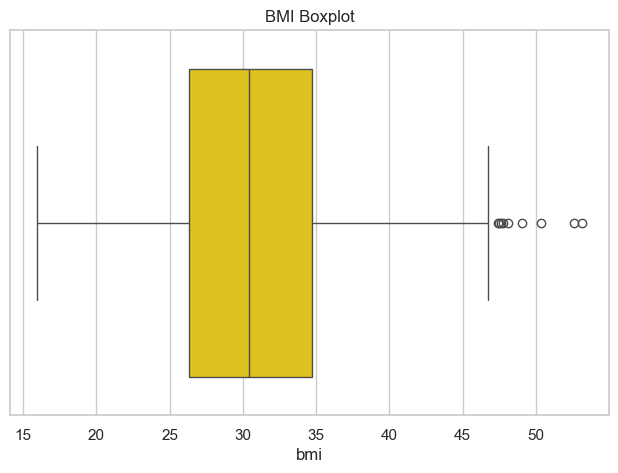

In [67]:
plt.figure(figsize = (17, 11))
plt.subplot(2, 2, 2)
sns.boxplot(x = insurance_df['bmi'], color = 'gold')
plt.title('BMI Boxplot')

Text(0.5, 1.0, 'Children Count')

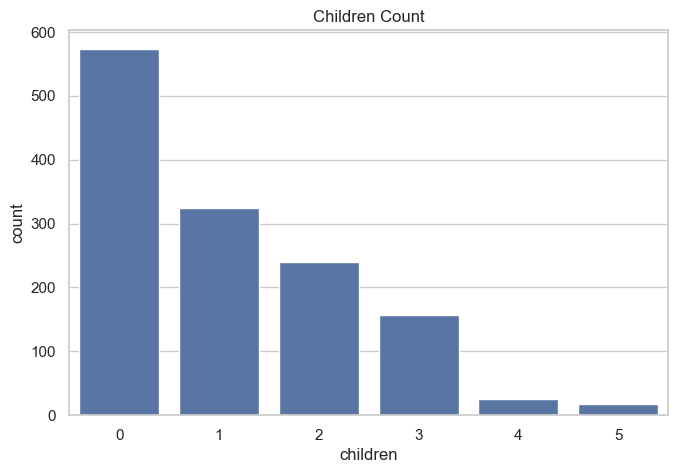

In [73]:
plt.figure(figsize = (17, 11))
plt.subplot(2, 2, 3)
sns.countplot(x = insurance_df['children'])
plt.title('Children Count')

Text(0.5, 1.0, 'Smoker Distribution')

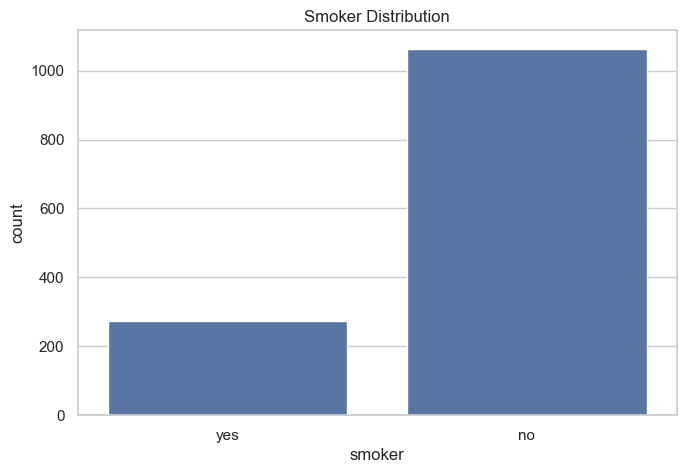

In [79]:
plt.figure(figsize=(17,11))
plt.subplot(2, 2, 1)
sns.countplot(x = insurance_df['smoker'])
plt.title('Smoker Distribution')

Text(0.5, 1.0, 'Region Distribution')

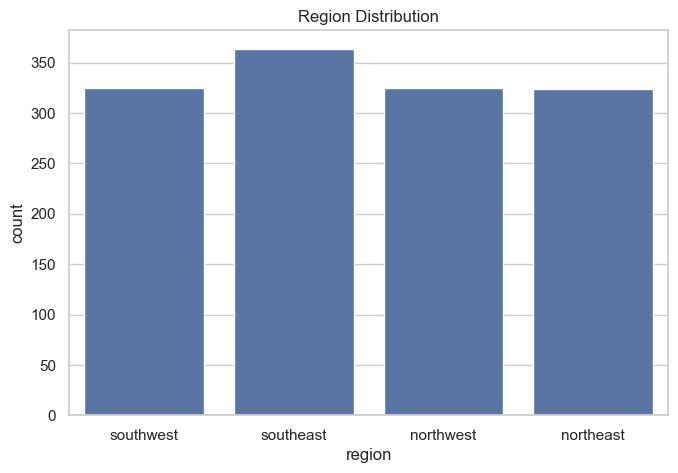

In [83]:
plt.figure(figsize=(17,11))
plt.subplot(2, 2, 2)
sns.countplot(x = insurance_df['region'])
plt.title('Region Distribution')

Text(0.5, 1.0, 'Charges Distribution')

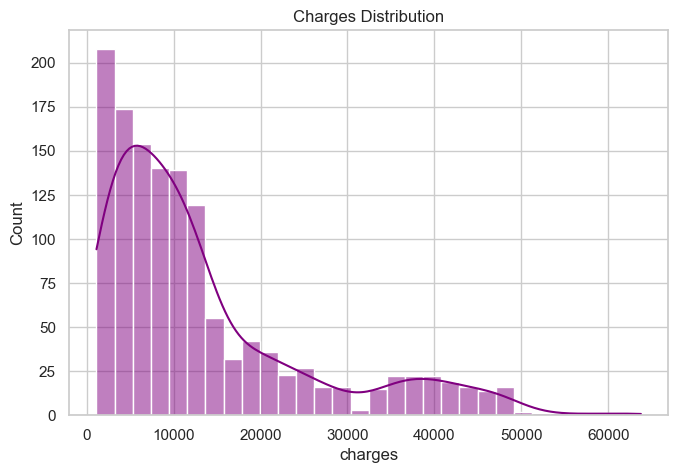

In [85]:
plt.figure(figsize=(17,11))
plt.subplot(2, 2, 3)
sns.histplot(insurance_df['charges'], kde = True, color='purple')
plt.title('Charges Distribution')

1. Age vs Charges (Numerical vs Numerical): Scatter Plot: To observe the relationship between age and charges.
2. BMI vs Charges (Numerical vs Numerical): Scatter Plot: To check how BMI affects charges.
3. Children vs Charges (Categorical/Numerical vs Numerical): Box Plot: To visualize how the number of children impacts charges.
4. Sex vs Charges (Categorical vs Numerical): Box Plot: To see the distribution of charges across sexes.
5. Smoker vs Charges (Categorical vs Numerical): Box Plot: To observe how smoking affects charges.
6. Region vs Charges (Categorical vs Numerical): Box Plot: To visualize the effect of region on charges.

In [91]:
# Bivariate Analysis

plt.figure(figsize=(15, 12))

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

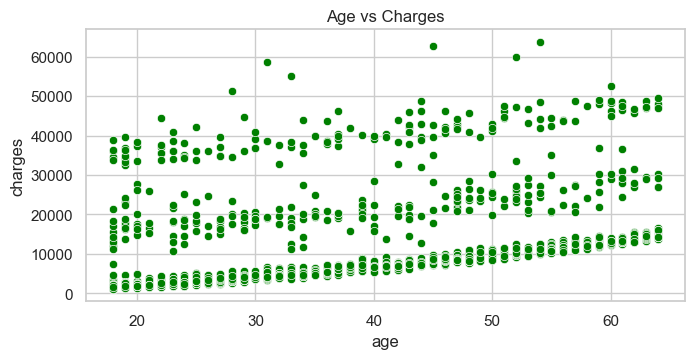

In [105]:
# 1. Age vs Charges (Scatter Plot)
plt.figure(figsize=(17, 12))
plt.subplot(3, 2, 1)
sns.scatterplot(x = insurance_df['age'], y = insurance_df['charges'], color='green')
plt.title('Age vs Charges')
plt.show()

Text(0.5, 1.0, 'BMI vs Charges')

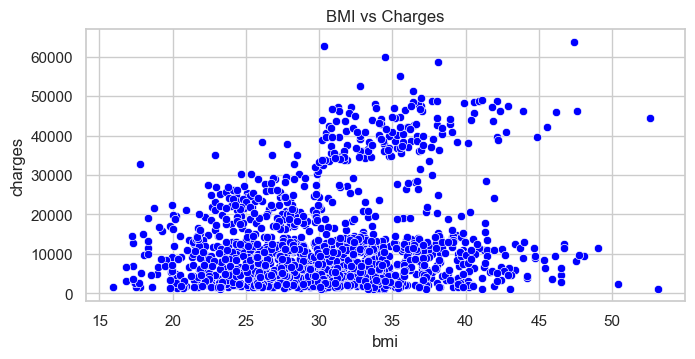

In [103]:
# 2. BMI vs Charges (Scatter Plot)
plt.figure(figsize=(17, 12))
plt.subplot(3, 2, 2)
sns.scatterplot(x = insurance_df['bmi'], y = insurance_df['charges'], color = 'blue')
plt.title('BMI vs Charges')

Text(0.5, 1.0, 'Children vs Charges')

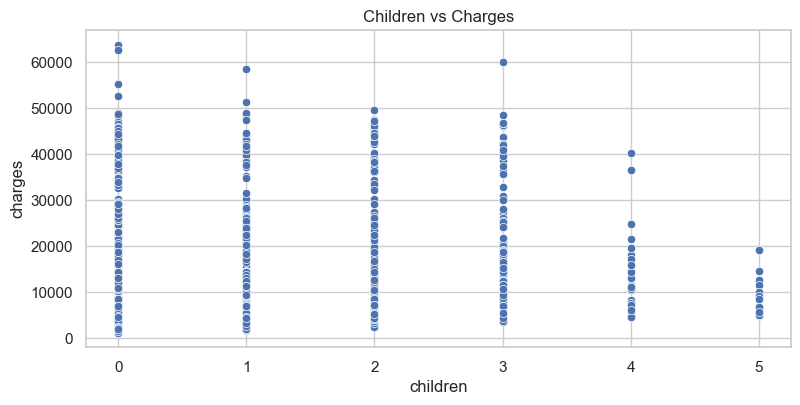

In [144]:
# 3. Children vs Charges (Box Plot)
plt.figure(figsize=(20, 14))
plt.subplot(3, 2, 3)
sns.scatterplot(x = insurance_df['children'], y = insurance_df['charges'], palette = "Set2")
plt.title('Children vs Charges')

Text(0.5, 1.0, 'Sex vs Charges')

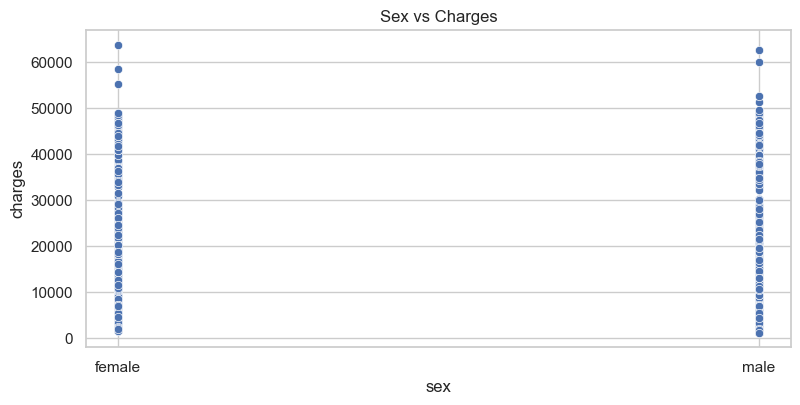

In [148]:
# 4. Sex vs Charges (Box Plot)
plt.figure(figsize=(20, 14))
plt.subplot(3, 2, 4)
sns.scatterplot(x = insurance_df['sex'], y = insurance_df['charges'], palette = "Set2")
plt.title('Sex vs Charges')

Text(0.5, 1.0, 'Smoker vs Charges')

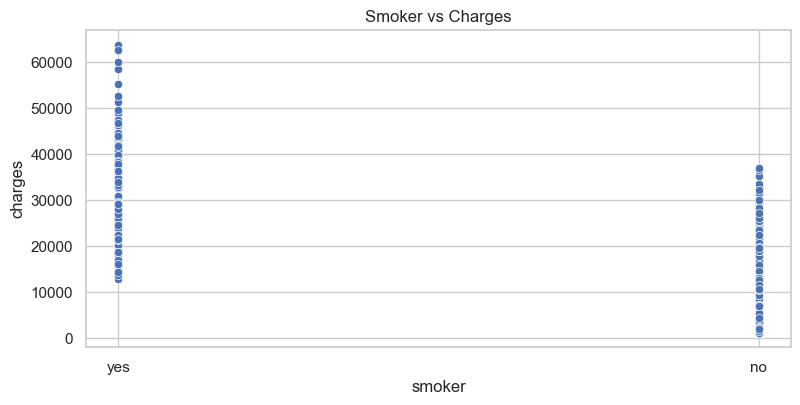

In [137]:
# 5. Smoker vs Charges (Box Plot)
plt.figure(figsize=(20, 14))
plt.subplot(3, 2, 5)
sns.scatterplot(x = insurance_df['smoker'], y=insurance_df['charges'], palette = "Set1")
plt.title('Smoker vs Charges')

Text(0.5, 1.0, 'Region vs Charges')

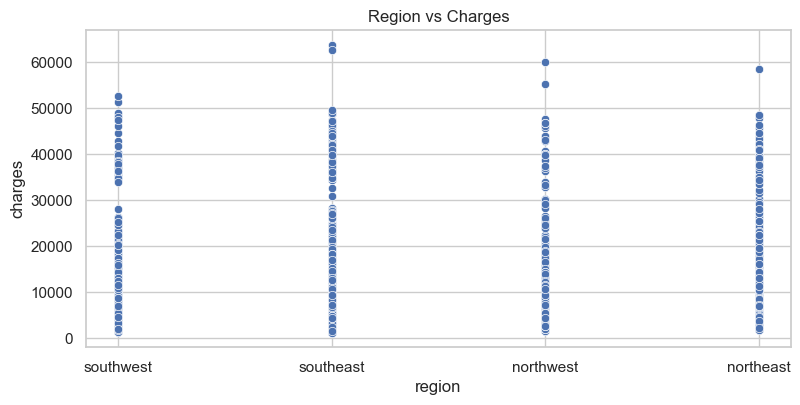

In [139]:
# 6. Region vs Charges (Box Plot)
plt.figure(figsize=(20, 14))
plt.subplot(3, 2, 6)
sns.scatterplot(x=insurance_df['region'], y = insurance_df['charges'], palette="coolwarm")
plt.title('Region vs Charges')


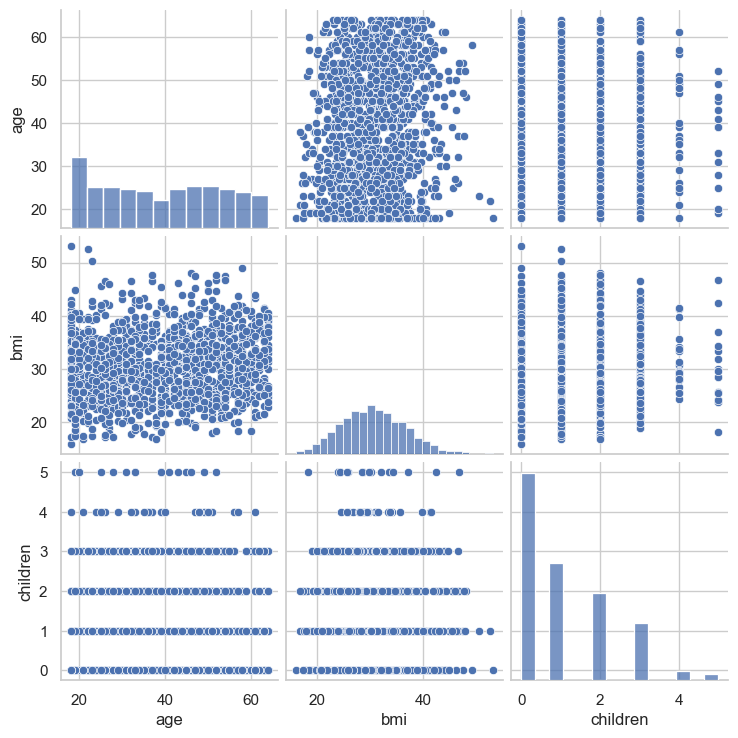

In [193]:
# Filter numeric columns for pairplot
numeric_columns = insurance_df[['age', 'bmi', 'children']]

# 1. Pairplot for numerical variables (age, bmi, charges, children)
sns.pairplot(numeric_columns,  palette='coolwarm')
plt.show()

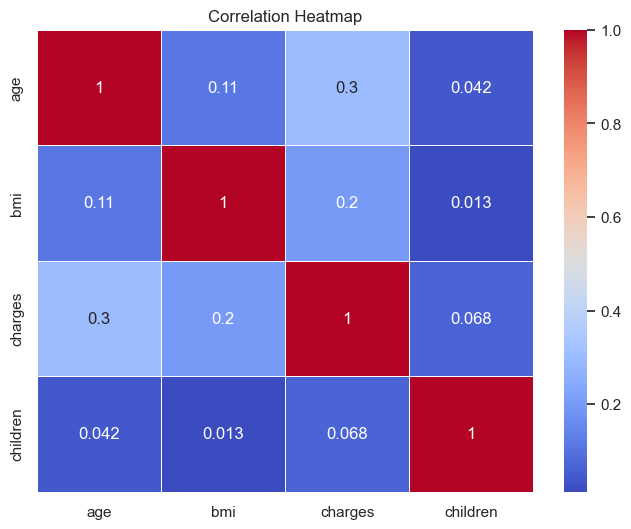

In [155]:
# 2. Heatmap for correlation between numerical variables
plt.figure(figsize=(8, 6))
corr = numeric_columns.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

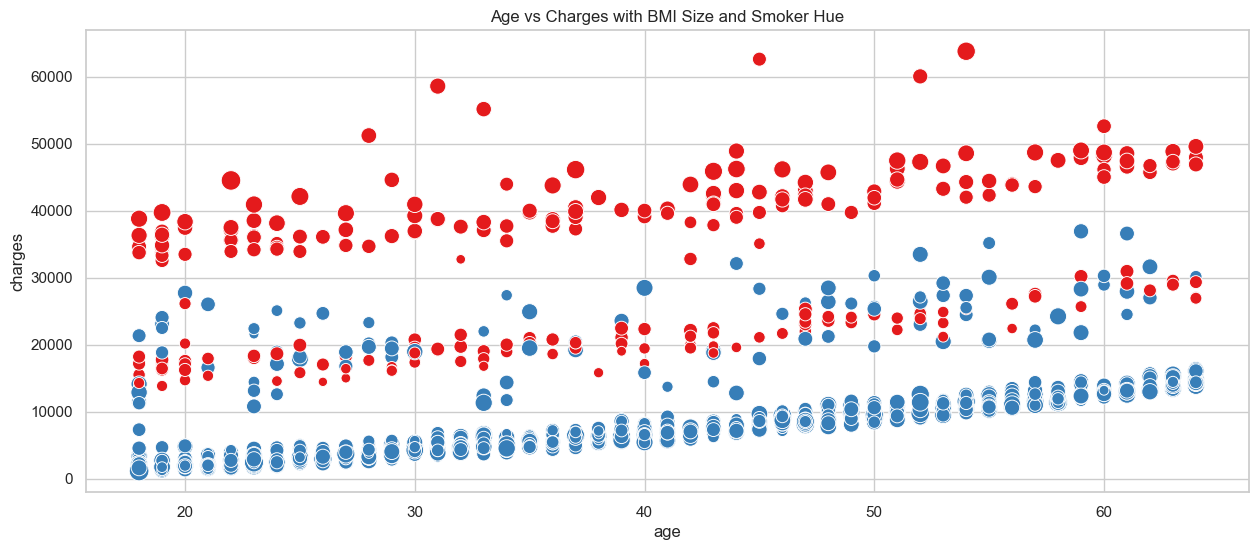

In [191]:
# 3. Scatterplot with hue for multivariate relationship (Age vs Charges with BMI as size and Smoker as hue)
plt.figure(figsize=(15, 6))
sns.scatterplot(x='age', y='charges', hue='smoker', size='bmi', sizes=(40, 200), data=insurance_df, palette='Set1', legend=False)
plt.title('Age vs Charges with BMI Size and Smoker Hue')
plt.show()

Smokers

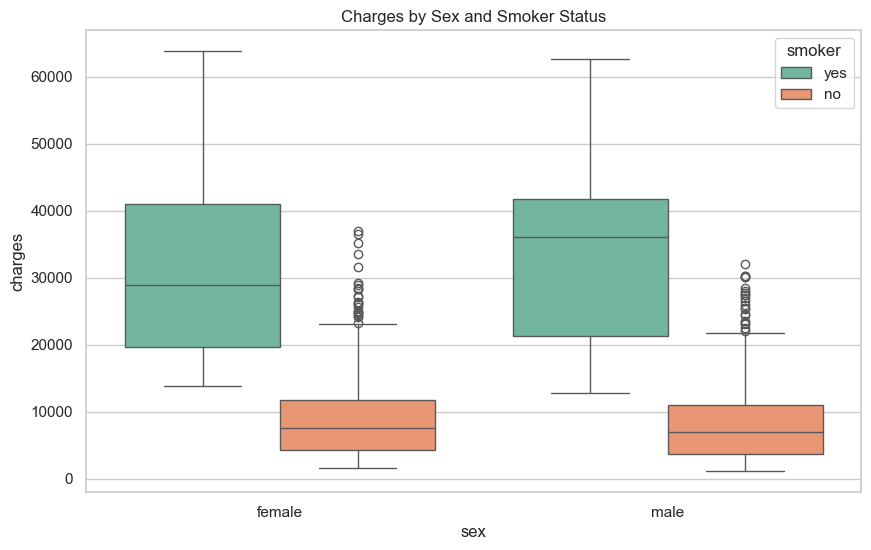

In [163]:
# 4. Boxplot for Sex and Smoker vs Charges
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='charges', hue='smoker', data = insurance_df, palette='Set2')
plt.title('Charges by Sex and Smoker Status')
plt.show()

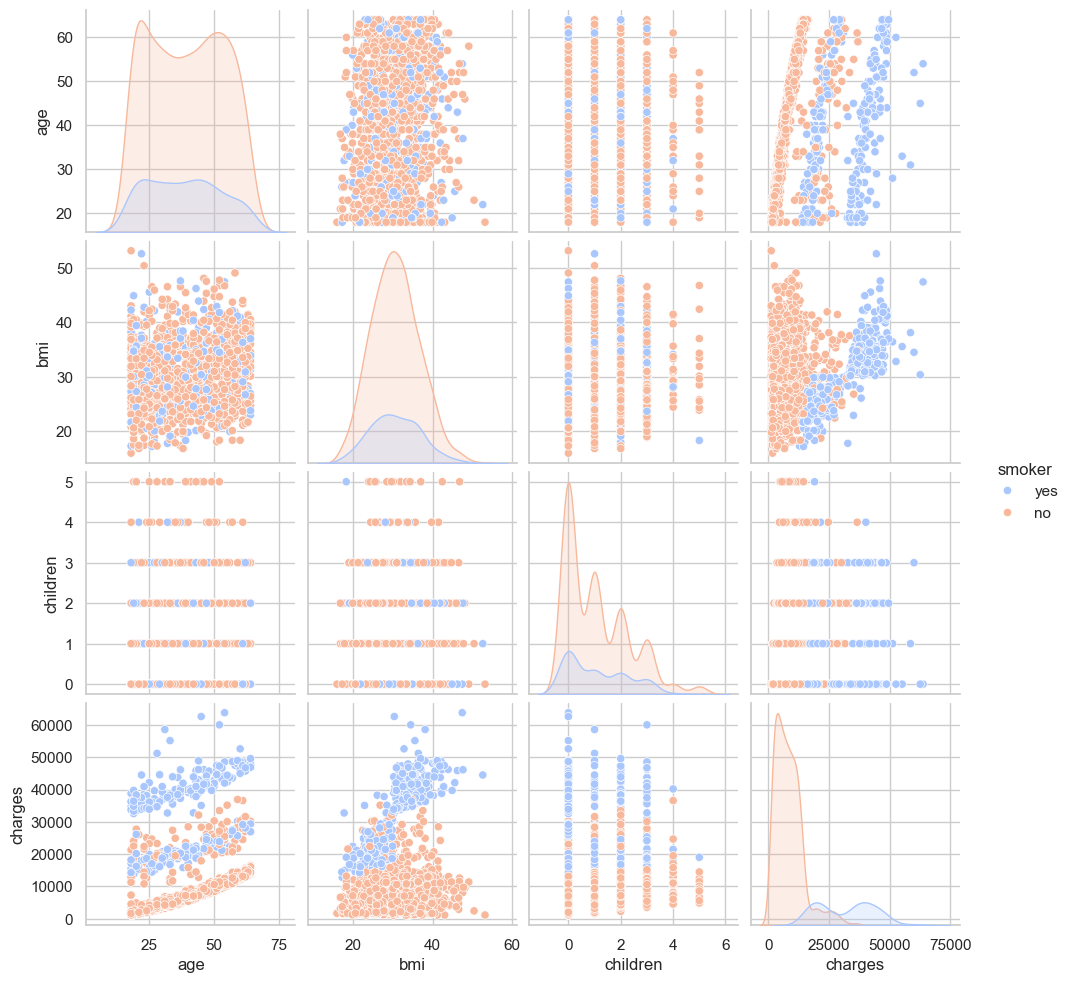

In [171]:
sns.pairplot(insurance_df, hue='smoker', diag_kind='kde', palette='coolwarm')
plt.show()

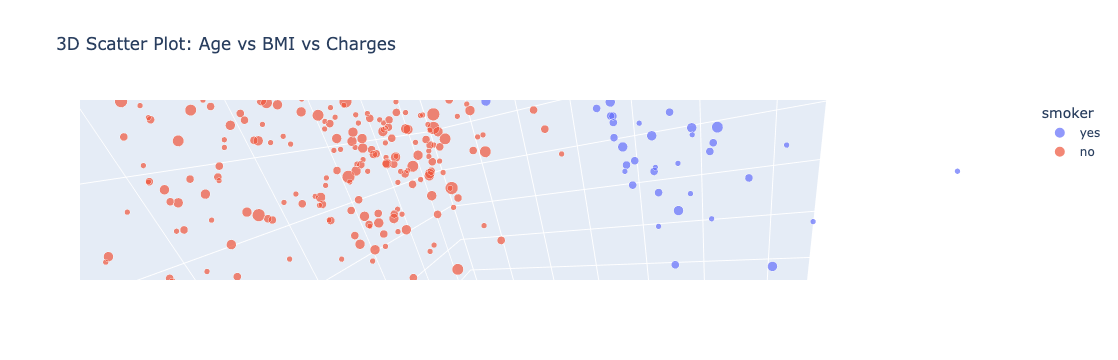

In [177]:
fig = px.scatter_3d(insurance_df, x='age', y='bmi', z='charges', color='smoker', size='children', 
                    title="3D Scatter Plot: Age vs BMI vs Charges")
fig.show()

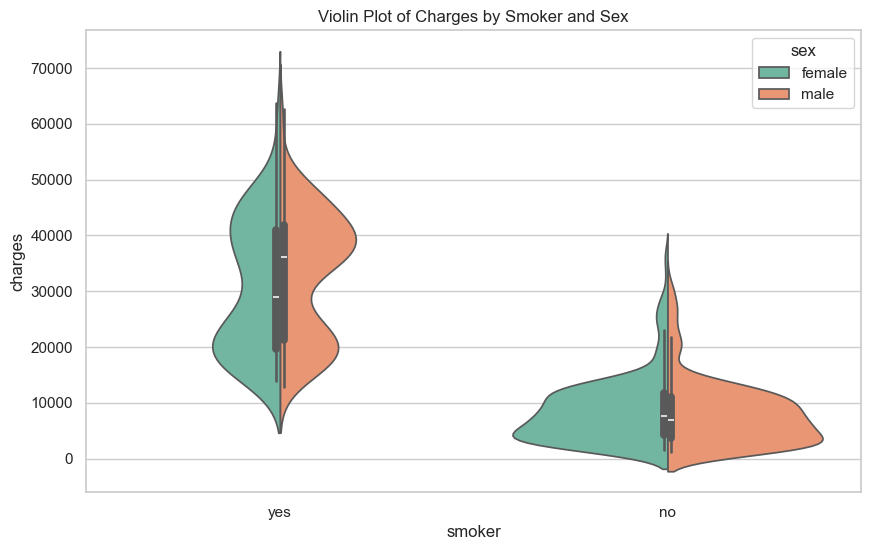

In [179]:
plt.figure(figsize=(10, 6))
sns.violinplot(x = 'smoker', y = 'charges', hue = 'sex', data = insurance_df, split=True, palette='Set2')
plt.title('Violin Plot of Charges by Smoker and Sex')
plt.show()


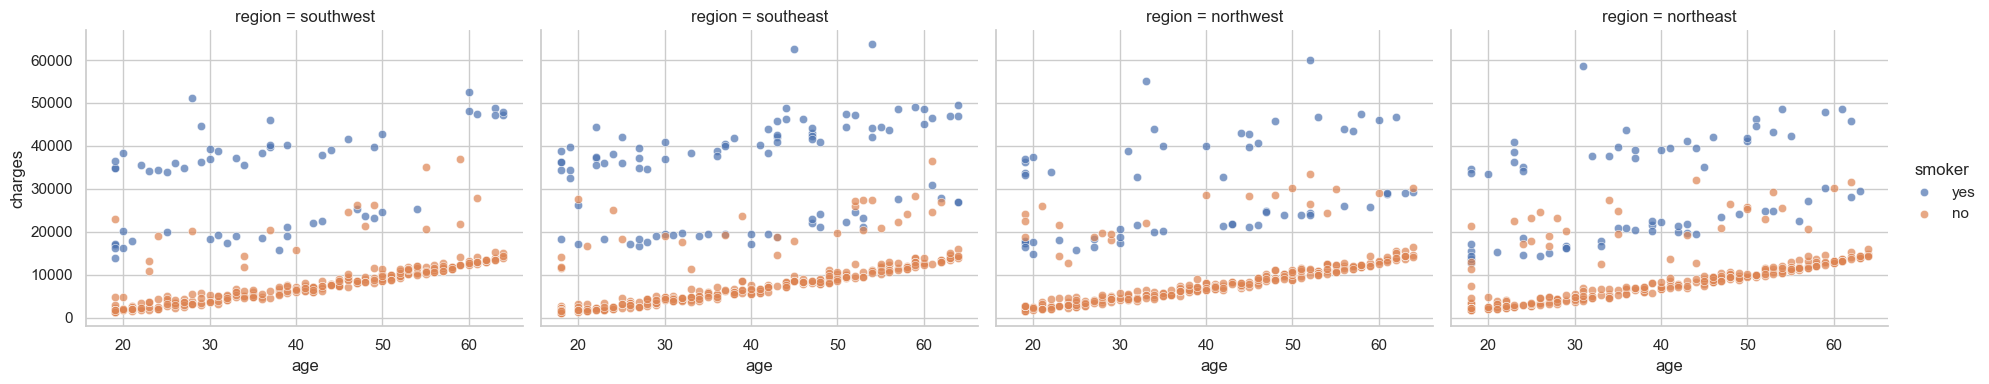

In [183]:
g = sns.FacetGrid(insurance_df, col = "region", hue = "smoker", height = 4, aspect = 1.2)
g.map(sns.scatterplot, "age", "charges", alpha=.7)
g.add_legend()
plt.show()

Explained variance by PC1: 0.1921684897602018
Explained variance by PC2: 0.16586792074727552
Explained variance by PC3: 0.13701263349093856
Explained variance by PC4: 0.13277752758575048
Explained variance by PC5: 0.11936150405481283
Explained variance by PC6: 0.11579237383569
Explained variance by PC7: 0.09778543178532324
Explained variance by PC8: 0.03923411874000776


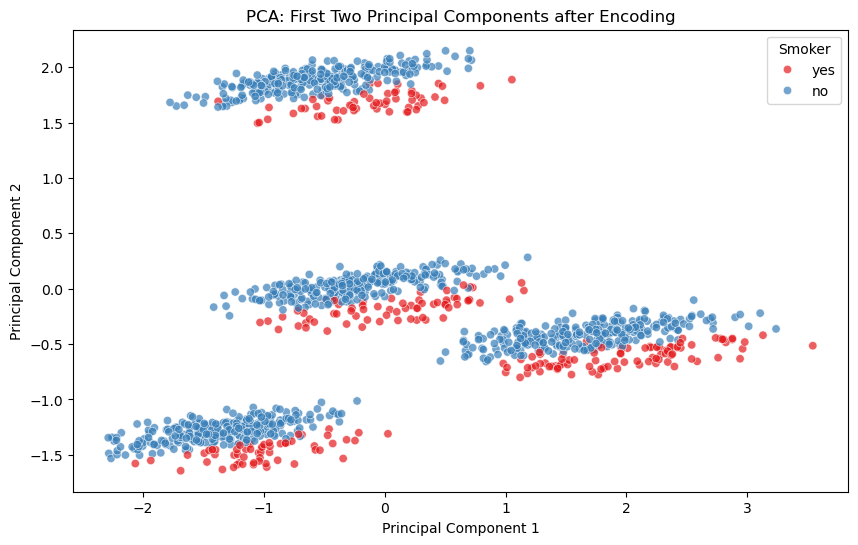

In [83]:
encoder = OneHotEncoder(drop='first', sparse_output=False)
categorical_columns = ['sex', 'smoker', 'region']
encoded_categorical = encoder.fit_transform(insurance_df[categorical_columns])


encoded_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_columns))

numeric_df = insurance_df[['age', 'bmi', 'children']]
combined_df = pd.concat([numeric_df, encoded_df], axis=1)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(combined_df)

pca = PCA(n_components=None) 
principal_components = pca.fit_transform(scaled_data)


explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

for i, var in enumerate(explained_variance):
    print(f"Explained variance by PC{i+1}: {var}")

plt.figure(figsize=(10, 6))
sns.scatterplot(x = principal_components[:, 0], y = principal_components[:, 1], hue = insurance_df['smoker'], palette='Set1', alpha=0.7)
plt.title('PCA: First Two Principal Components after Encoding')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Smoker')
plt.show()


Explained variance by PC1: 0.20060309157445785
Explained variance by PC2: 0.181366402297387
Explained variance by PC3: 0.1699231368186166
Explained variance by PC4: 0.16087702325770536
Explained variance by PC5: 0.15399424412600723
Explained variance by PC6: 0.13323610192582613


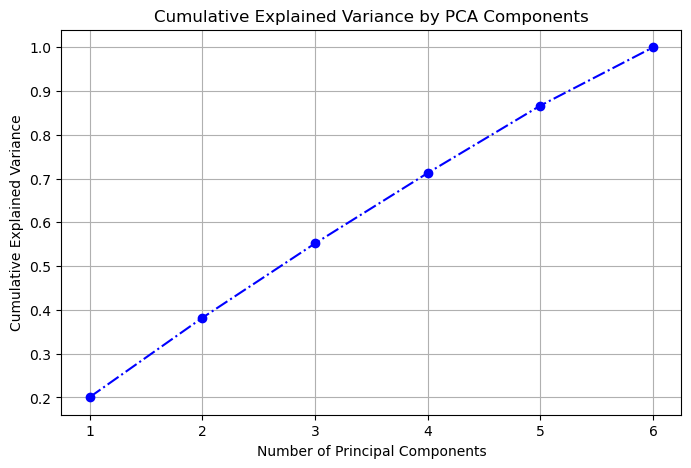

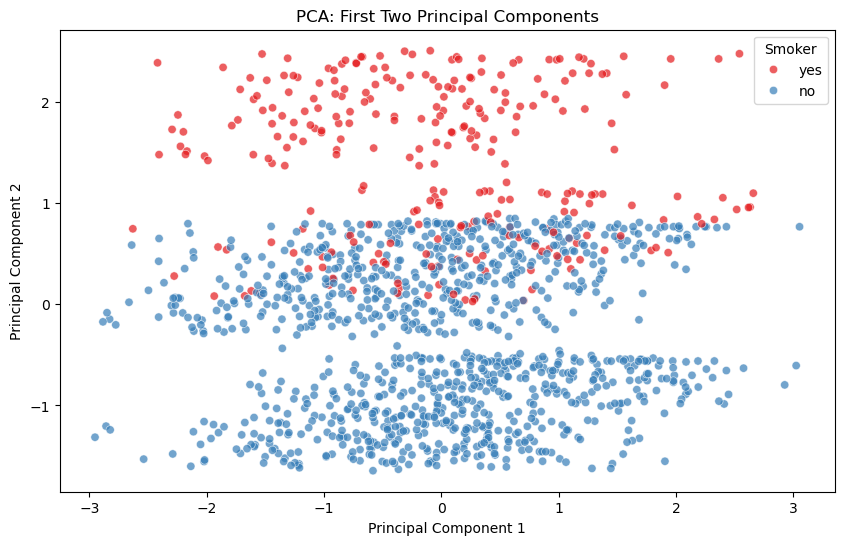

In [102]:
label_encoder = LabelEncoder()
insurance_df['sex_encoded'] = label_encoder.fit_transform(insurance_df['sex'])
insurance_df['smoker_encoded'] = label_encoder.fit_transform(insurance_df['smoker'])
insurance_df['region_encoded'] = label_encoder.fit_transform(insurance_df['region'])

numeric_df = insurance_df[['age', 'bmi', 'children', 'sex_encoded', 'smoker_encoded', 'region_encoded']]
 
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

pca = PCA(n_components=None)
principal_components = pca.fit_transform(scaled_data)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

for i, var in enumerate(explained_variance):
    print(f"Explained variance by PC{i+1}: {var}")

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-.', color='b')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=principal_components[:, 0], y=principal_components[:, 1], hue=insurance_df['smoker'], palette='Set1', alpha=0.7)
plt.title('PCA: First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Smoker')
plt.show()
